# Лабораторная работа №4
## Выполнила студентка группы ДПИ22-2, Сирина Яна

Полиномиальные модели

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("gen_regression.csv")
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


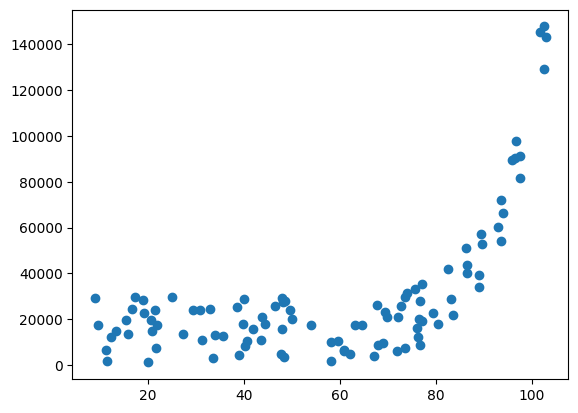

In [111]:
X = data.x
y = data.y
plt.scatter(X, y)
plt.show()

Время обучения модели линейной регрессии: 0.0021 секунд
Score: 0.37


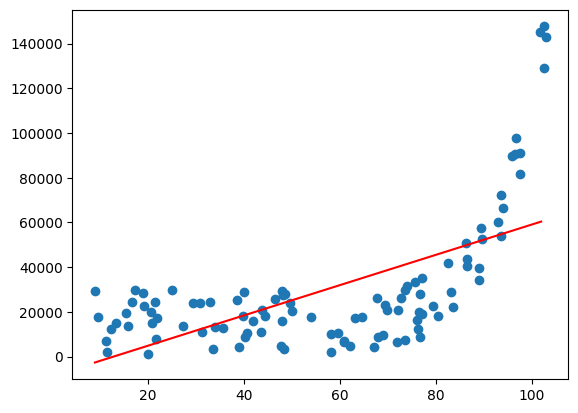

In [112]:
import time
from sklearn.linear_model import LinearRegression


X = pd.DataFrame(X)

start_time = time.time()
linear = LinearRegression().fit(X.values, y)
end_time = time.time()

xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

print(f"Время обучения модели линейной регрессии: {end_time - start_time:.4f} секунд")
print(f"Score: {linear.score(X.values, y):.2f}")
plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')
plt.show()

Время обучения полиномиальной регрессии (степень 2): 0.0004 секунд
Score: 0.74


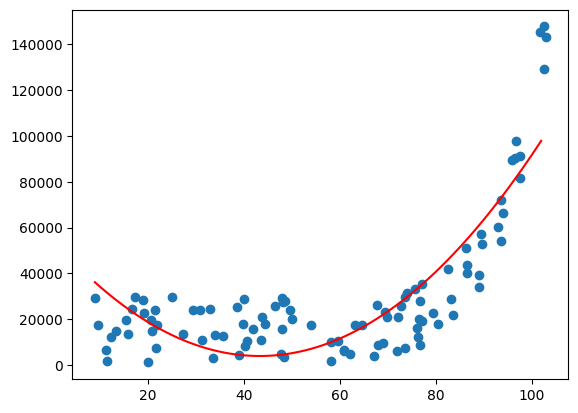

In [113]:
from sklearn.preprocessing import PolynomialFeatures

transformation = PolynomialFeatures(degree=2)
transformation.fit(X.values)
X_2 = transformation.transform(X.values)

start_time = time.time()
poly_2d = LinearRegression().fit(X_2, y)
end_time = time.time()

xx_2d = transformation.transform(pd.DataFrame(xx))
yy_2d = poly_2d.predict(xx_2d)

print(f"Время обучения полиномиальной регрессии (степень 2): {end_time - start_time:.4f} секунд")
print(f"Score: {poly_2d.score(X_2, y):.2f}")
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')
plt.show()

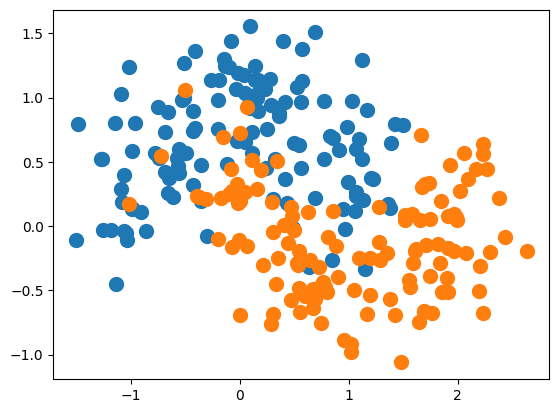

In [114]:
data = pd.read_csv("gen_classification.csv",
                   index_col=0)
y = data.y
X = data.drop(["y"], axis=1)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], s=100)
plt.show()

Время обучения логистической регрессии: 0.0049 секунд
Score: 0.83


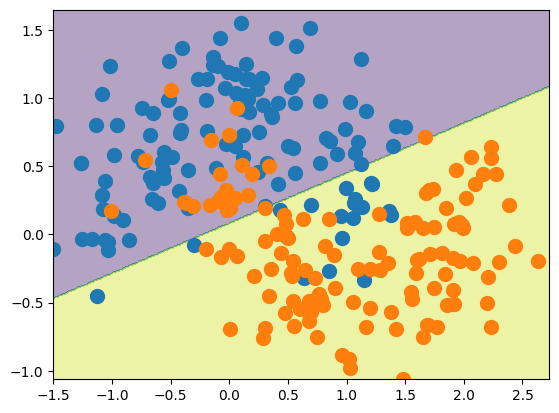

In [115]:
from sklearn.linear_model import LogisticRegression
start_time = time.time()
logistic = LogisticRegression().fit(X.values, y)
end_time = time.time()
xx, yy = np.meshgrid(
    np.arange(X.min().iloc[0], X.max().iloc[0]+0.1, 0.01),
    np.arange(X.min().iloc[1], X.max().iloc[1]+0.1, 0.01))

XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

print(f"Время обучения логистической регрессии: {end_time - start_time:.4f} секунд")
print(f"Score: {logistic.score(X.values, y):.2f}")
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], s=100)
plt.show()

Shape: (250, 9)
Время обучения полиномиальной регрессии (степень 3): 0.0020 секунд
Score: 0.90


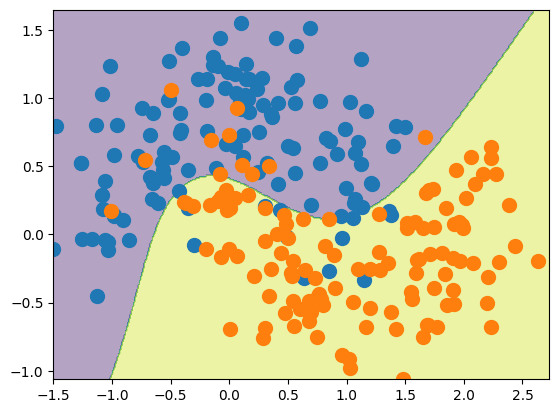

In [116]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)

X_3 = class_transform.fit_transform(X.values)
print(f"Shape: {X_3.shape}")

start_time = time.time()
class_3 = LogisticRegression().fit(X_3, y)
end_time = time.time()

print(f"Время обучения полиномиальной регрессии (степень 3): {end_time - start_time:.4f} секунд")
print(f"Score: {class_3.score(X_3, y):.2f}")

Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], s=100)
plt.show()

In [117]:
data_kc_prices = pd.read_csv("kc_house_data.csv")
print(data_kc_prices.shape)
print(data_kc_prices.head())

(21613, 21)
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode    

In [118]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

In [119]:
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
print(f"Score: {reg_kc_multiple.score(X_kc_prices, y_kc_prices):.2f}")

Score: 0.70


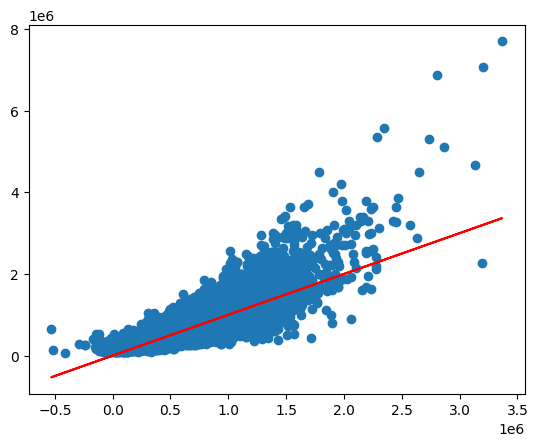

In [120]:
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')
plt.show()

(21613, 18)
Время обучения полиномиальной регрессии (степень 3): 1.2332 секунд
Score: 0.83


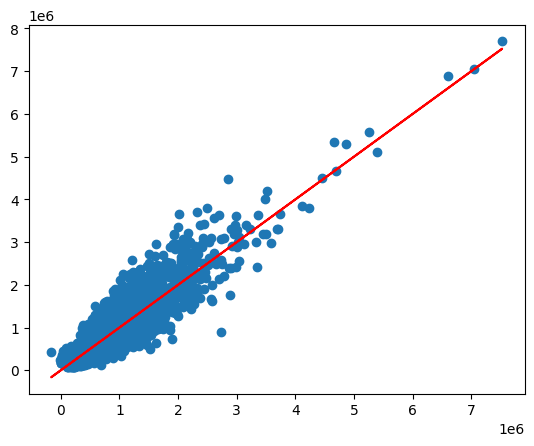

In [121]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)
print(X_kc_prices.shape)

start_time = time.time()
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
end_time = time.time()
print(f"Время обучения полиномиальной регрессии (степень 3): {end_time - start_time:.4f} секунд")
print(f"Score: {reg_poly2_kc.score(X_3_kc_prices, y_kc_prices):.2f}")
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')
plt.show()

**1. В выполненной работе добавьте замер времени обучения каждой модели.**

**2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.**

Время обучения полиномиальной регрессии (степень 5): 0.0003 секунд
Score: 0.92


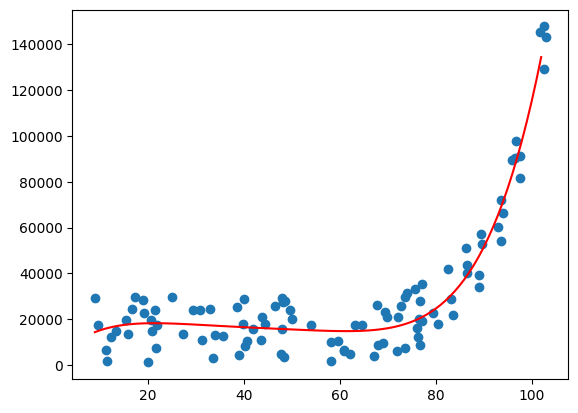

In [122]:
class_5 = PolynomialFeatures(degree=5, include_bias=False)
data_gen_regr = pd.read_csv("gen_regression.csv")

X_g = data_gen_regr.x
y_g = data_gen_regr.y

X_g = pd.DataFrame(X_g)

xx_g = np.arange(X_g.x.min(axis=0), X_g.x.max(axis=0))

class_5.fit(X_g.values)
X_5 = class_5.transform(X_g.values)

start_time = time.time()
gen_regr_5d = LinearRegression().fit(X_5, y_g)
end_time = time.time()

xx_5d = class_5.transform(pd.DataFrame(xx_g))
yy_5d = gen_regr_5d.predict(xx_5d)

print(f"Время обучения полиномиальной регрессии (степень 5): {end_time - start_time:.4f} секунд")
print(f"Score: {gen_regr_5d.score(X_5, y_g):.2f}")
plt.scatter(X_g.x, y_g)
plt.plot(xx_g, yy_5d, c='r')
plt.show()

gen_reg_data = []
gen_reg_data.append([gen_regr_5d.score(X_5, y_g), end_time - start_time, 5])

Время обучения полиномиальной регрессии (степень 10): 0.0003 секунд
Score: 0.92


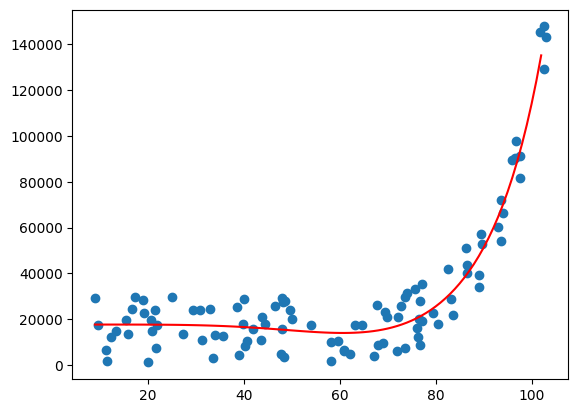

In [123]:
class_10 = PolynomialFeatures(degree=10, include_bias=False)

class_10.fit(X_g.values)
X_10 = class_10.transform(X_g.values)

start_time = time.time()
gen_regr_10d = LinearRegression().fit(X_10, y_g)
end_time = time.time()

xx_10d = class_10.transform(pd.DataFrame(xx_g))
yy_10d = gen_regr_10d.predict(xx_10d)

print(f"Время обучения полиномиальной регрессии (степень 10): {end_time - start_time:.4f} секунд")
print(f"Score: {gen_regr_10d.score(X_10, y_g):.2f}")
plt.scatter(X_g.x, y_g)
plt.plot(xx_g, yy_10d, c='r')
plt.show()

gen_reg_data.append([gen_regr_10d.score(X_10, y_g), end_time - start_time, 10])

Время обучения полиномиальной регрессии (степень 100): 0.0008 секунд
Score: 0.79


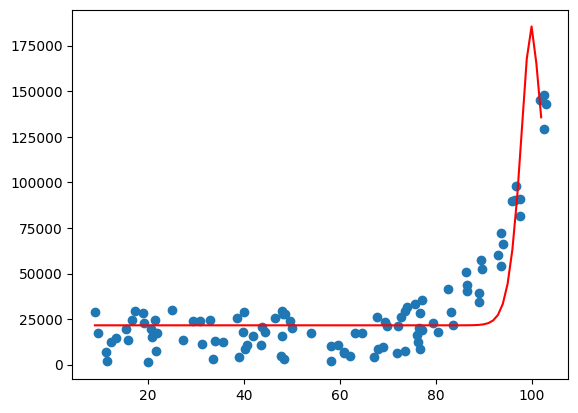

In [124]:
class_100 = PolynomialFeatures(degree=100, include_bias=False)

class_100.fit(X_g.values)
X_100 = class_100.transform(X_g.values)

start_time = time.time()
gen_regr_100d = LinearRegression().fit(X_100, y_g)
end_time = time.time()

xx_100d = class_100.transform(pd.DataFrame(xx_g))
yy_100d = gen_regr_100d.predict(xx_100d)

print(f"Время обучения полиномиальной регрессии (степень 100): {end_time - start_time:.4f} секунд")
print(f"Score: {gen_regr_100d.score(X_100, y_g):.2f}")
plt.scatter(X_g.x, y_g)
plt.plot(xx_g, yy_100d, c='r')
plt.show()

gen_reg_data.append([gen_regr_100d.score(X_100, y_g), end_time - start_time, 100])

**3. То же самое проделайте с датасетом для классификации и "King county".**

In [125]:
data = pd.read_csv("gen_classification.csv",
                   index_col=0)
y = data.y
X = data.drop(["y"], axis=1)

Время обучения полиномиальной регрессии (степень 5): 0.0020 секунд
Score: 0.92


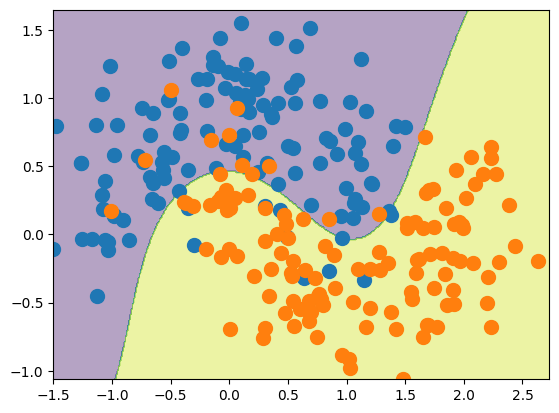

In [126]:
class_transform = PolynomialFeatures(degree=5, include_bias=False)
X_5 = class_transform.fit_transform(X.values)

start_time = time.time()
class_5 = LogisticRegression().fit(X_5, y)
end_time = time.time()

print(f"Время обучения полиномиальной регрессии (степень 5): {end_time - start_time:.4f} секунд")
print(f"Score: {class_5.score(X_5, y):.2f}")

Z = class_5.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], s=100)
plt.show()

list_data_gen_classif = []
list_data_gen_classif.append([class_5.score(X_5, y), end_time - start_time, 5])

Время обучения полиномиальной регрессии (степень 10): 0.0032 секунд
Score: 0.92


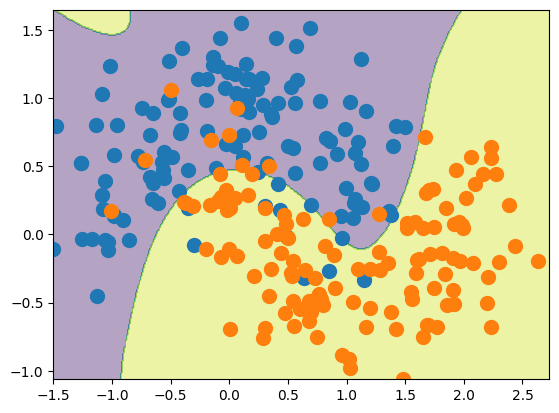

In [127]:
class_transform = PolynomialFeatures(degree=10, include_bias=False)
X_10 = class_transform.fit_transform(X.values)

start_time = time.time()
class_10 = LogisticRegression().fit(X_10, y)
end_time = time.time()

print(f"Время обучения полиномиальной регрессии (степень 10): {end_time - start_time:.4f} секунд")
print(f"Score: {class_10.score(X_10, y):.2f}")

Z = class_10.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], s=100)
plt.show()
list_data_gen_classif.append([class_5.score(X_5, y), end_time - start_time, 10])

Время обучения полиномиальной регрессии (степень 100): 0.0666 секунд
Score: 0.62


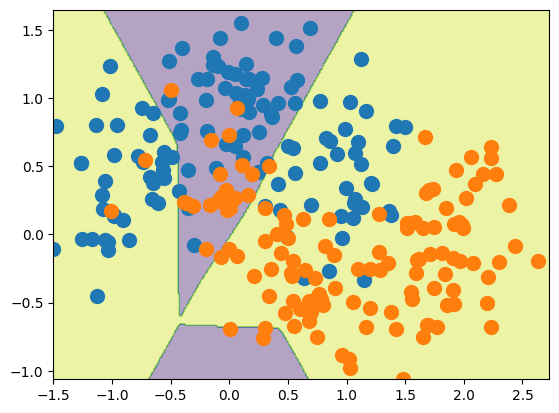

In [128]:
class_transform = PolynomialFeatures(degree=100, include_bias=False)
X_100 = class_transform.fit_transform(X.values)

start_time = time.time()
class_100 = LogisticRegression(solver='liblinear').fit(X_100, y)
end_time = time.time()

print(f"Время обучения полиномиальной регрессии (степень 100): {end_time - start_time:.4f} секунд")
print(f"Score: {class_100.score(X_100, y):.2f}")

Z = class_100.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], s=100)
plt.show()
list_data_gen_classif.append([class_5.score(X_5, y), end_time - start_time, 100])

In [129]:
data_kc_prices = pd.read_csv("kc_house_data.csv")
y_kc_prices = data_kc_prices.price[:500]

X_kc_prices = data_kc_prices.drop(["id", "date", "price", "yr_renovated", "zipcode","condition", "grade","floors", "long","view", "bedrooms", "bathrooms", "waterfront"], axis=1)[:500]

Время обучения полиномиальной регрессии (степень 5): 0.0260 секунд
Score: 0.92


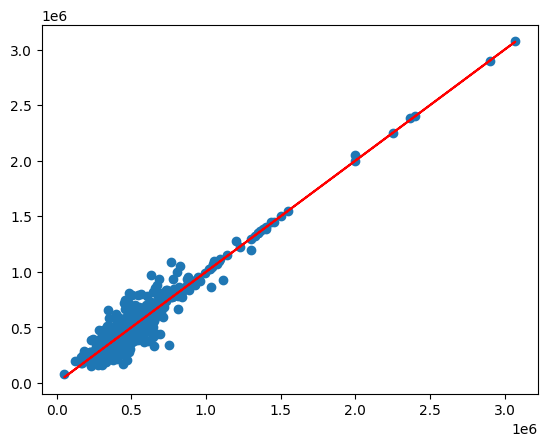

In [130]:
X_5_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=5)).fit_transform(X_kc_prices)

start_time = time.time()
reg_poly5_kc = LinearRegression().fit(X_5_kc_prices, y_kc_prices)
end_time = time.time()

print(f"Время обучения полиномиальной регрессии (степень 5): {end_time - start_time:.4f} секунд")
print(f"Score: {reg_poly5_kc.score(X_5_kc_prices, y_kc_prices):.2f}")

y_pred_kc_prices = reg_poly5_kc.predict(X_5_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')
plt.show()

list_data_city = []
list_data_city.append([reg_poly5_kc.score(X_5_kc_prices, y_kc_prices), end_time - start_time, 5])

Время обучения полиномиальной регрессии (степень 10): 0.8911 секунд
Score: 0.11


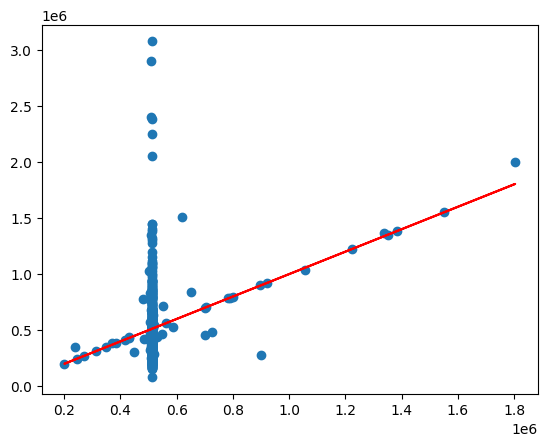

In [131]:
X_10_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=10)).fit_transform(X_kc_prices)

start_time = time.time()
reg_poly10_kc = LinearRegression().fit(X_10_kc_prices, y_kc_prices)
end_time = time.time()

print(f"Время обучения полиномиальной регрессии (степень 10): {end_time - start_time:.4f} секунд")
print(f"Score: {reg_poly10_kc.score(X_10_kc_prices, y_kc_prices):.2f}")

y_pred_kc_prices = reg_poly10_kc.predict(X_10_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')
plt.show()

list_data_city.append([reg_poly5_kc.score(X_5_kc_prices, y_kc_prices), end_time - start_time, 10])

In [132]:
list_data_city.append([None, None,None,None])

**4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.**

In [133]:
models = []
degrees =[]
scores = []
times = []

for model, name in [(gen_reg_data, "GEN_REGRESSION"), (list_data_gen_classif, "GEN_CLASSIFICATION"), (list_data_city, "KING CITY")]:
  for type_ in model:
    models.append(name)
    degrees.append(type_[2])
    scores.append(type_[0])
    times.append(type_[1])
pd.DataFrame({"Model": models, "degree":degrees, "score":scores, "time":times})

,Model,degree,score,time
0,GEN_REGRESSION,5.0,0.921748,0.000312
1,GEN_REGRESSION,10.0,0.922247,0.000343
2,GEN_REGRESSION,100.0,0.792462,0.000840
3,GEN_CLASSIFICATION,5.0,0.916000,0.001975
4,GEN_CLASSIFICATION,10.0,0.916000,0.003197
5,GEN_CLASSIFICATION,100.0,0.916000,0.066638
6,KING CITY,5.0,0.920623,0.025988
7,KING CITY,10.0,0.920623,0.891091
8,KING CITY,NaN,NaN,NaN


5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.

In [134]:
reg_kc_multiple.coef_

array([-3.57665414e+04,  4.11442785e+04,  1.10442865e+02,  1.28597869e-01,
        6.68955012e+03,  5.82960458e+05,  5.28709424e+04,  2.63856491e+04,
        9.58904452e+04,  7.07852243e+01,  3.96576399e+01, -2.62022321e+03,
        1.98125837e+01, -5.82419866e+02,  6.02748226e+05, -2.14729828e+05,
        2.16814005e+01, -3.82641850e-01])

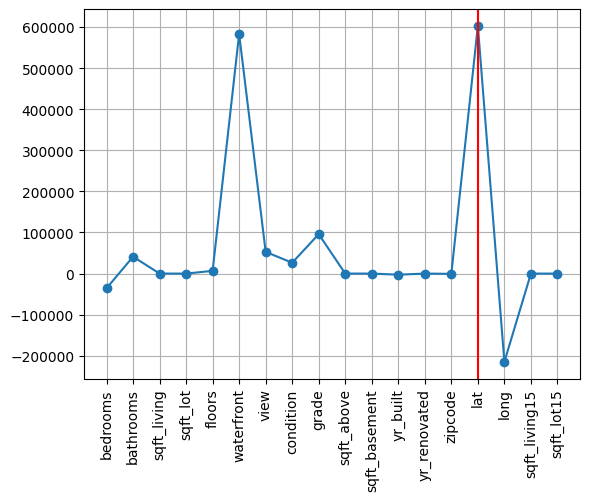

In [135]:
data_kc_prices = pd.read_csv("kc_house_data.csv")

y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)

plt.plot(X_kc_prices.columns, reg_kc_multiple.coef_, marker='o')
plt.xticks(rotation=90)
plt.grid(visible = True)

plt.axvline("lat", color= 'red')
plt.show()

6. Попробуйте также проинтерпретировать полиномиальную модель.

In [136]:
len(reg_poly2_kc.coef_)

1330